In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data=pd.read_csv('../R_workspace/sender_activity_by_patient_df.csv', index_col=0)
data.drop(index='Proliferating', inplace=True)


In [44]:
mat=data.T.corr()

In [45]:
correlation_matrix = mat.T.corr() # correlation of the correlation matrix rows
correlation_matrix

,Alveolar_Macrophages,AT1,AT2,B cell,CD16_Monocytes,CD8 cytotoxic T,Club cells,DC,Endothelial,"Fibroblast|COMP,CILP",...,"Macrophages|SPP1,CHI3L1",Mast,Monocytes,"Neutrophil|GBP1,GBP5",Neutrophil|Heatshock,"Neutrophil|MMP9, CST7",NK,Plasma,T,Type1_IFN_Response_Monocytes
Alveolar_Macrophages,1.000000,-0.476739,0.605854,-0.143012,0.612265,0.742736,0.352982,0.922040,-0.617769,-0.379806,...,0.089284,0.670782,0.821520,0.319024,-0.501131,0.116128,-0.109924,-0.592433,0.079317,0.652352
AT1,-0.476739,1.000000,-0.083526,0.718733,-0.545479,0.014299,-0.288446,-0.627884,0.498911,0.441998,...,-0.232253,-0.003560,-0.511036,0.379329,0.549667,0.092830,0.189816,0.271817,0.188208,0.012841
AT2,0.605854,-0.083526,1.000000,0.006354,0.796589,0.409786,0.801549,0.501520,-0.410851,0.131613,...,0.004091,0.926005,0.305431,0.121929,0.154702,0.064106,0.297622,-0.453792,0.265101,0.263941
B cell,-0.143012,0.718733,0.006354,1.000000,-0.351989,0.355935,-0.174091,-0.367270,0.345448,0.200743,...,-0.537257,0.176302,-0.322609,0.594701,0.354082,0.116093,0.462826,0.300626,0.104720,0.407009
CD16_Monocytes,0.612265,-0.545479,0.796589,-0.351989,1.000000,0.317978,0.751157,0.647259,-0.614565,0.045948,...,0.194944,0.699998,0.463551,-0.103606,0.077136,-0.064616,0.297721,-0.485668,0.031096,0.232643
CD8 cytotoxic T,0.742736,0.014299,0.409786,0.355935,0.317978,1.000000,0.166132,0.527246,-0.536856,-0.025627,...,-0.004883,0.663617,0.539089,0.658005,-0.066537,-0.002239,0.242413,-0.593271,-0.062236,0.967504
Club cells,0.352982,-0.288446,0.801549,-0.174091,0.751157,0.166132,1.000000,0.247771,-0.440120,0.206879,...,-0.028609,0.731621,0.048571,-0.133079,0.291014,-0.110713,0.489359,-0.447048,0.071466,0.086382
DC,0.922040,-0.627884,0.501520,-0.367270,0.647259,0.527246,0.247771,1.000000,-0.556028,-0.503007,...,0.092273,0.485001,0.926883,0.218320,-0.571732,0.253920,-0.290807,-0.515760,0.177204,0.467271
Endothelial,-0.617769,0.498911,-0.410851,0.345448,-0.614565,-0.536856,-0.440120,-0.556028,1.000000,0.269710,...,-0.591936,-0.573069,-0.361446,-0.217811,0.167951,-0.080065,0.052978,0.893145,-0.125240,-0.498337
"Fibroblast|COMP,CILP",-0.379806,0.441998,0.131613,0.200743,0.045948,-0.025627,0.206879,-0.503007,0.269710,1.000000,...,0.021207,0.105077,-0.400759,-0.329258,0.770606,-0.710205,0.690249,0.176516,-0.562954,-0.090880


In [9]:
from scipy.cluster.hierarchy import linkage, fcluster

In [11]:
import numpy as np

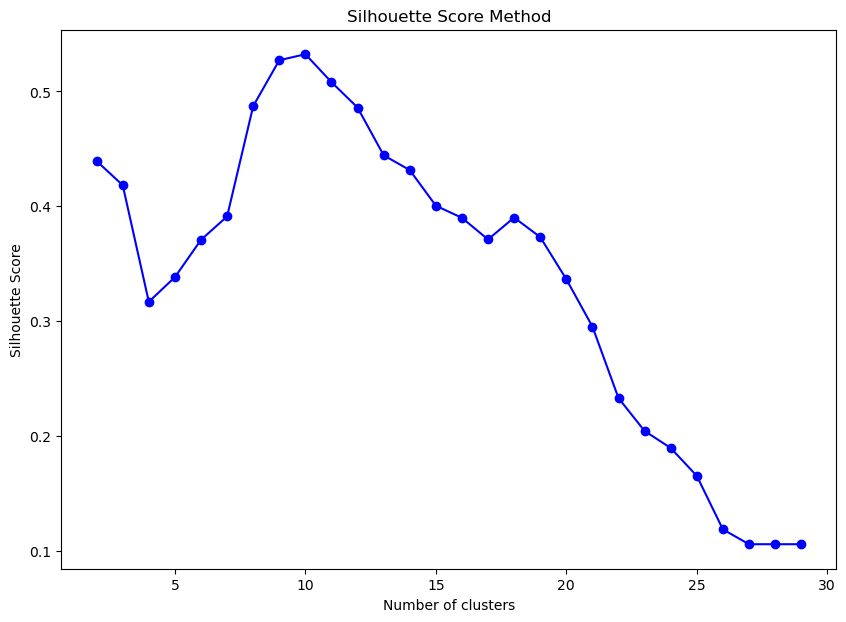

The optimal number of clusters is 10


In [46]:

# Perform hierarchical clustering
row_linkage = linkage(mat, method='average', metric='correlation')
# Convert the correlation matrix to a distance matrix
distance_matrix = 1 - correlation_matrix


# Perform hierarchical clustering and extract labels for different cluster counts
silhouette_scores = []
K = range(2, 30)

for k in K:
    row_clusters = fcluster(row_linkage, k, criterion='maxclust')
    score = silhouette_score(distance_matrix, row_clusters, metric='precomputed')
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(K, silhouette_scores, 'bo-')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.savefig('../new_man_figs/Fig1/hierarchical_clustering_k_silhouette_sender_signal_cooccurence.pdf')
plt.show()

# Determine the best number of clusters
optimal_clusters = K[np.argmax(silhouette_scores)]
print(f'The optimal number of clusters is {optimal_clusters}')

In [13]:
from matplotlib.colors import LinearSegmentedColormap

# Define the custom color palette
colors = ["#6d8fb9", "white", "#cb604c"]
cmap = LinearSegmentedColormap.from_list("custom_palette", colors)

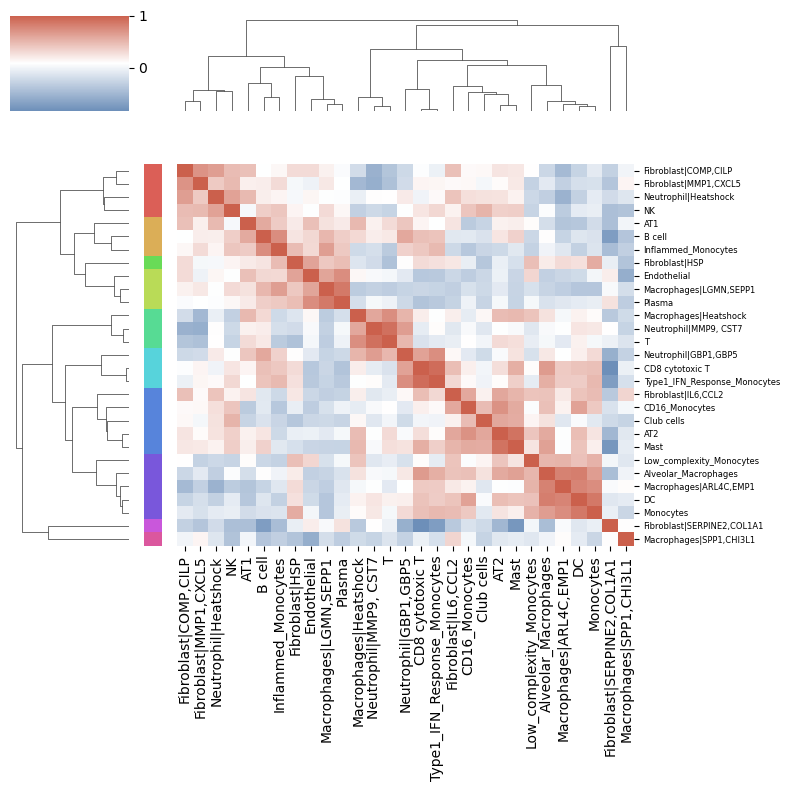

In [47]:
num_clusters = 10  # Specify the number of clusters you want
row_clusters = fcluster(row_linkage, num_clusters, criterion='maxclust')
lut = dict(zip(set(row_clusters), sns.hls_palette(10)))
# lut =dict(zip(set(row_clusters), ["#faaa5e", "#ca5e4a",  "#4e88b9","#6ca659",  "#4e4ca0","#24492e","#edd746"]))
row_colors = pd.DataFrame(row_clusters)[0].map(lut)

p=sns.clustermap(mat,method='average', metric='correlation',row_colors=[row_colors],yticklabels=True,figsize=(8, 8), linewidths=0, cmap=cmap)
p.ax_heatmap.set_yticklabels(p.ax_heatmap.get_ymajorticklabels(), fontsize = 6)

plt.tight_layout()            
plt.savefig('../new_man_figs/Fig4/avgCorr_linkage_clustering_k10_sender_signal_activity_co-occurence.pdf',bbox_inches='tight')
plt.show()

# TB patients only and tB up-regulated interactions 

In [29]:
data=pd.read_csv('../R_workspace/sender_activity_by_patient_TB_upregulated_df.csv', index_col=0)



In [30]:
data

,P0,P4,P6,P8,P36,P37,P38,P43,P11
"Neutrophil|MMP9, CST7",52.586499,48.130583,43.977609,42.698893,49.883696,43.646808,0.000000,50.060320,49.404224
Monocytes,111.113951,91.401678,92.192163,91.477595,91.686053,92.769207,103.024111,113.009681,80.428037
"Fibroblast|COMP,CILP",278.747506,243.214460,237.075203,232.938895,0.000000,0.000000,272.704056,0.000000,0.000000
"Fibroblast|SERPINE2,COL1A1",0.000000,52.046319,0.000000,0.000000,245.340780,234.483634,0.000000,0.000000,0.000000
DC,117.010341,96.106186,91.553632,100.511875,104.616736,109.685728,117.072886,123.893915,114.174930
Neutrophil|Heatshock,117.829035,90.894846,100.256449,0.000000,0.000000,0.000000,0.000000,0.000000,40.136729
"Neutrophil|GBP1,GBP5",60.444980,50.066902,55.975321,51.837029,0.000000,45.528121,0.000000,61.648994,60.492102
AT2,83.391140,58.420202,76.014461,38.923882,70.829682,0.000000,65.505778,72.434630,48.110718
"Fibroblast|MMP1,CXCL5",248.958501,0.000000,244.319811,283.728144,0.000000,0.000000,293.970198,0.000000,240.524038
CD16_Monocytes,136.057254,127.338941,107.750914,0.000000,109.034959,0.000000,86.718305,124.678774,127.561257


In [38]:
data.drop(index='Proliferating', inplace=True)

In [39]:
mat=data.T.corr()

In [40]:
correlation_matrix = mat.T.corr() # correlation of the correlation matrix rows
correlation_matrix

,"Neutrophil|MMP9, CST7",Monocytes,"Fibroblast|COMP,CILP","Fibroblast|SERPINE2,COL1A1",DC,Neutrophil|Heatshock,"Neutrophil|GBP1,GBP5",AT2,"Fibroblast|MMP1,CXCL5",CD16_Monocytes,...,"Macrophages|ARL4C,EMP1",CD8 cytotoxic T,Alveolar_Macrophages,"Macrophages|LGMN,SEPP1",B cell,NK,Macrophages|Heatshock,Type1_IFN_Response_Monocytes,T,Plasma
"Neutrophil|MMP9, CST7",1.000000,-0.233225,-0.244955,0.028426,-0.348796,0.398908,0.588281,0.095233,-0.350327,0.218343,...,-0.433057,-0.150723,-0.729237,-0.554737,0.306374,-0.080051,0.619530,0.026037,0.949206,0.005208
Monocytes,-0.233225,1.000000,0.154428,-0.244371,0.661813,-0.051911,-0.003734,0.394734,-0.022662,0.229816,...,0.559649,0.294672,0.563676,-0.329456,0.116769,0.369502,0.129376,0.254052,-0.213009,0.125908
"Fibroblast|COMP,CILP",-0.244955,0.154428,1.000000,-0.688564,-0.374190,0.703983,0.282543,0.403720,0.755930,0.177939,...,-0.567530,0.333101,-0.153102,-0.328652,0.512144,0.486389,0.501297,0.448283,-0.128449,-0.644137
"Fibroblast|SERPINE2,COL1A1",0.028426,-0.244371,-0.688564,1.000000,-0.087752,-0.691285,-0.666657,-0.474723,-0.828667,-0.474298,...,0.438031,-0.649963,-0.031101,0.675382,-0.933799,-0.883556,-0.363423,-0.845477,-0.040478,0.803435
DC,-0.348796,0.661813,-0.374190,-0.087752,1.000000,-0.457154,-0.103775,0.030446,-0.060380,0.137329,...,0.823722,0.360910,0.848751,-0.078143,-0.011836,0.326330,-0.524969,0.259382,-0.418696,0.183848
Neutrophil|Heatshock,0.398908,-0.051911,0.703983,-0.691285,-0.457154,1.000000,0.651346,0.545307,0.511954,0.559431,...,-0.805641,0.228957,-0.453166,-0.640515,0.727418,0.621506,0.737814,0.505773,0.476819,-0.619277
"Neutrophil|GBP1,GBP5",0.588281,-0.003734,0.282543,-0.666657,-0.103775,0.651346,1.000000,0.033795,0.347263,0.168015,...,-0.525980,0.663981,-0.462246,-0.913454,0.842195,0.487622,0.488593,0.809731,0.477371,-0.751161
AT2,0.095233,0.394734,0.403720,-0.474723,0.030446,0.545307,0.033795,1.000000,0.269680,0.891770,...,-0.210476,-0.250466,0.122678,-0.248509,0.423649,0.627515,0.564990,0.036930,0.350361,0.063956
"Fibroblast|MMP1,CXCL5",-0.350327,-0.022662,0.755930,-0.828667,-0.060380,0.511954,0.347263,0.269680,1.000000,0.196091,...,-0.429903,0.511827,0.087870,-0.315561,0.654772,0.642265,0.097461,0.635827,-0.265604,-0.749370
CD16_Monocytes,0.218343,0.229816,0.177939,-0.474298,0.137329,0.559431,0.168015,0.891770,0.196091,1.000000,...,-0.218248,-0.152288,0.162052,-0.284432,0.481917,0.738644,0.380485,0.155415,0.405270,-0.009652


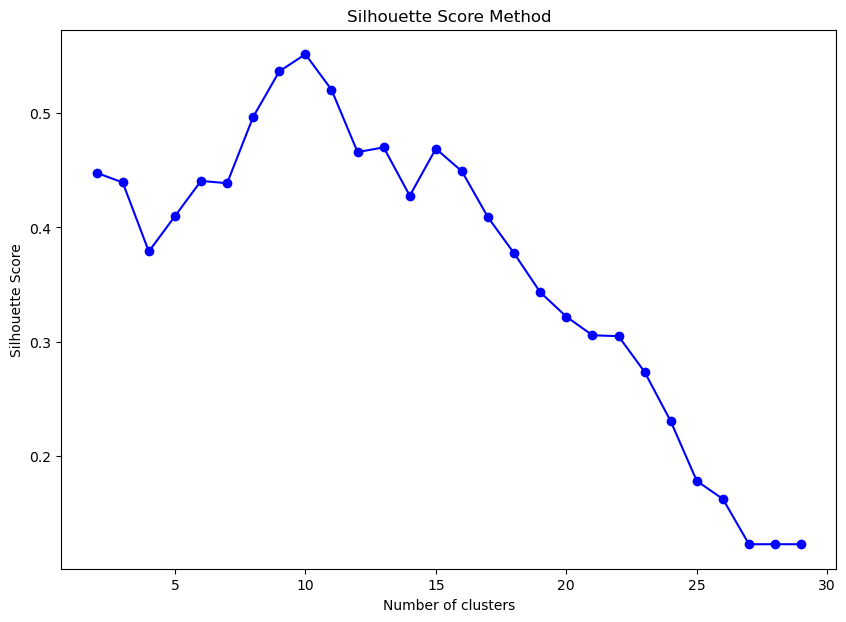

The optimal number of clusters is 10


In [41]:

# Perform hierarchical clustering
row_linkage = linkage(mat, method='average', metric='correlation')
# Convert the correlation matrix to a distance matrix
distance_matrix = 1 - correlation_matrix


# Perform hierarchical clustering and extract labels for different cluster counts
silhouette_scores = []
K = range(2, 30)

for k in K:
    row_clusters = fcluster(row_linkage, k, criterion='maxclust')
    score = silhouette_score(distance_matrix, row_clusters, metric='precomputed')
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(K, silhouette_scores, 'bo-')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.savefig('../new_man_figs/Fig1/hierarchical_clustering_k_silhouette_sender_signal_cooccurence_TB.pdf')
plt.show()

# Determine the best number of clusters
optimal_clusters = K[np.argmax(silhouette_scores)]
print(f'The optimal number of clusters is {optimal_clusters}')

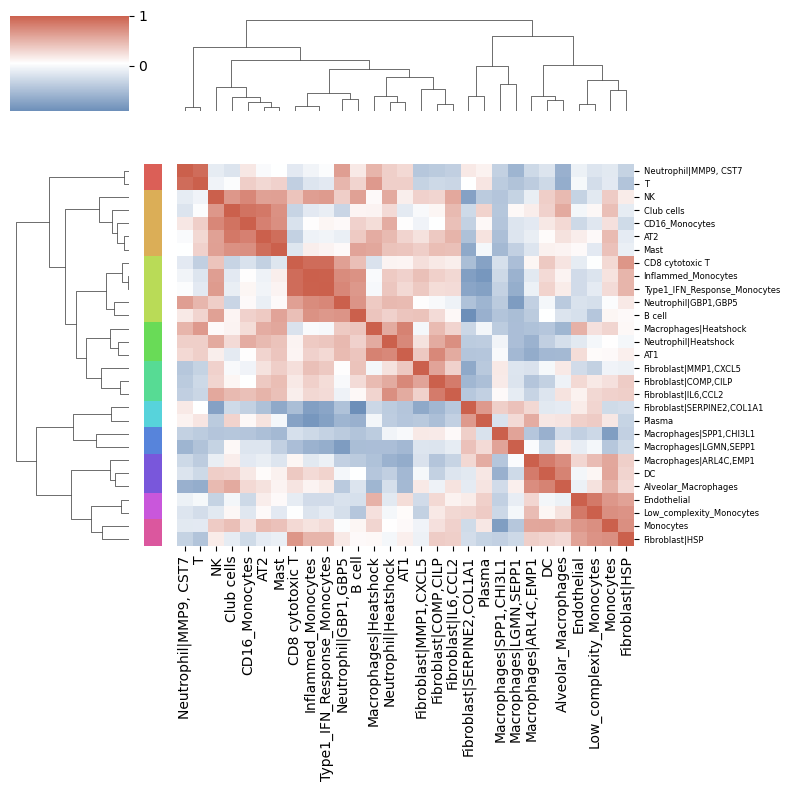

In [42]:
num_clusters = 10  # Specify the number of clusters you want
row_clusters = fcluster(row_linkage, num_clusters, criterion='maxclust')
lut = dict(zip(set(row_clusters), sns.hls_palette(10)))
# lut =dict(zip(set(row_clusters), ["#faaa5e", "#ca5e4a",  "#4e88b9","#6ca659",  "#4e4ca0","#24492e","#edd746"]))
row_colors = pd.DataFrame(row_clusters)[0].map(lut)

p=sns.clustermap(mat,method='average', metric='correlation',row_colors=[row_colors],yticklabels=True,figsize=(8, 8), linewidths=0, cmap=cmap)
p.ax_heatmap.set_yticklabels(p.ax_heatmap.get_ymajorticklabels(), fontsize = 6)

plt.tight_layout()            
plt.savefig('../new_man_figs/Fig4/avgCorr_linkage_clustering_k10_sender_signal_activity_TB_co-occurence.pdf',bbox_inches='tight')
plt.show()